In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\test.csv')
train = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\train.csv')

print('Train: ',train.shape)
print('Test: ',test.shape)
print()
print('Train: ',train.columns)
print('Test: ',test.columns)

Train:  (550068, 12)
Test:  (233599, 11)

Train:  Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')
Test:  Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [3]:
display(train.head(5), test.head(5))

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
display(train.isnull().sum(), test.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [5]:
display(train.dtypes, test.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [6]:
train.apply(lambda train:len(train.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [7]:
test.apply(lambda test:len(test.unique()))

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              18
Product_Category_3              16
dtype: int64

In [8]:
train['source']='train'
test['source']='test'

In [9]:
df_main=pd.concat([test, train], ignore_index=True)
df_main.shape

(783667, 13)

In [10]:
df = pd.DataFrame(df_main)
print(df.shape)
print()
print(df.info())

(783667, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
source                        783667 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 77.7+ MB
None


In [11]:
df.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
source                             0
dtype: int64

In [12]:
df['Stay_In_Current_City_Years'].replace({'4+':'4'}, inplace=True)

In [13]:
df['Age'].replace({'0-17':'A','18-25':'B','26-35':'C','36-45':'D','46-50':'E','51-55':'F','55+':'G'}, inplace=True)

In [14]:
df.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [15]:
print(df.shape)
print()
print(df.isnull().sum())

(783667, 11)

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
source                             0
dtype: int64


In [16]:
colname =[]
for j in df.columns[:]:
    if df[j].dtype == 'object':
        colname.append(j)
colname

['Age',
 'City_Category',
 'Gender',
 'Product_ID',
 'Stay_In_Current_City_Years',
 'source']

In [17]:
idsUnique = len(set(df.User_ID))
idsTotal = df.shape[0]
idsDupli = idsTotal - idsUnique
print('There are ' + str(idsDupli) + ' duplicate IDs for ' + str(idsTotal) + ' total entries')

There are 777776 duplicate IDs for 783667 total entries


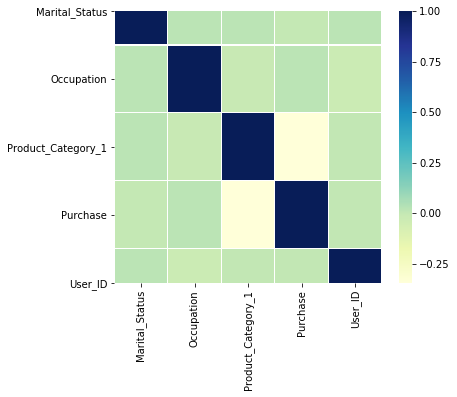

In [18]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Text(0.5, 1.0, 'Purchase amount Distribution')

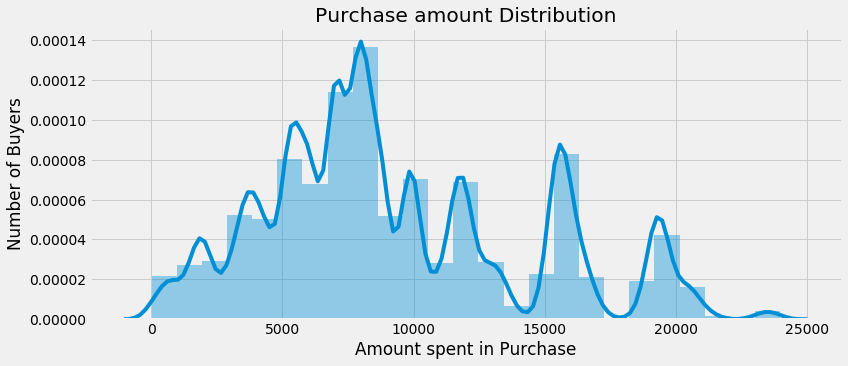

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
sns.distplot(df.Purchase, bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [20]:
print ('Skew is:', train.Purchase.skew())
print('Kurtosis: %f' % train.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


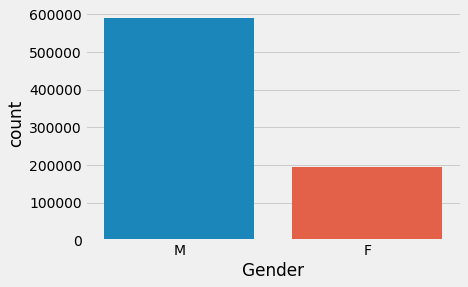

In [21]:
sns.countplot(df.Gender)

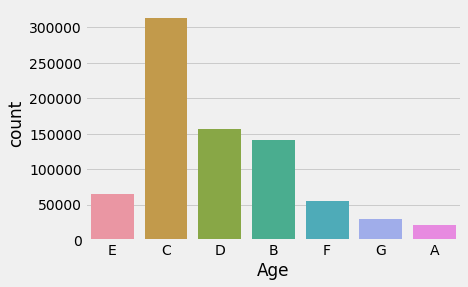

In [22]:
sns.countplot(df.Age)

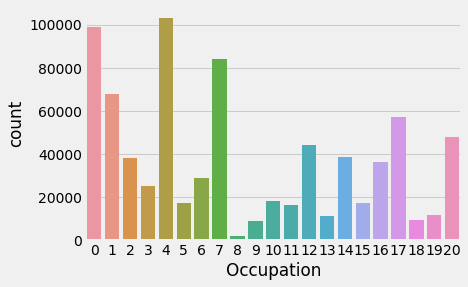

In [23]:
sns.countplot(df.Occupation)

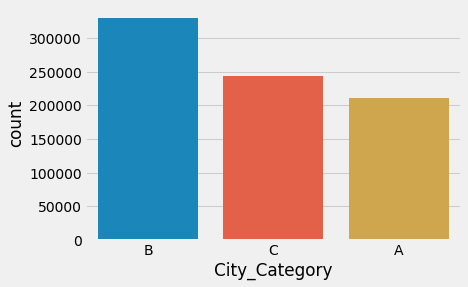

In [24]:
sns.countplot(df.City_Category)

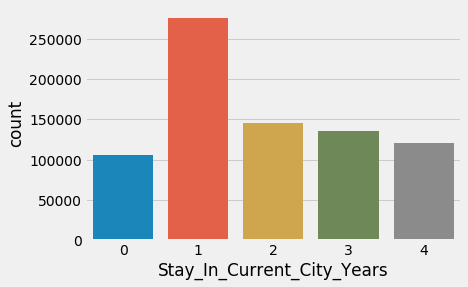

In [25]:
sns.countplot(df.Stay_In_Current_City_Years)

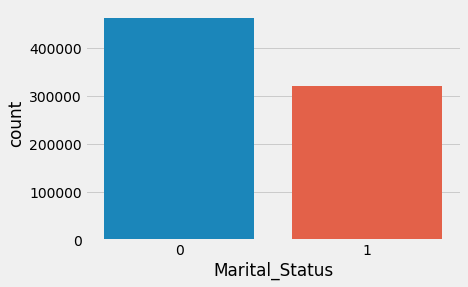

In [26]:
sns.countplot(df.Marital_Status)

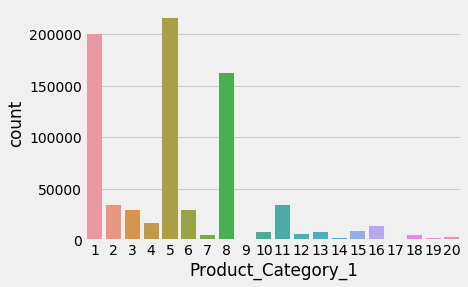

In [27]:
sns.countplot(df.Product_Category_1)

In [28]:
#Filter categorical variables and get dataframe will all strings columns names
category_cols = df.select_dtypes(include=['object']).columns.drop(['source'])
#Print frequency of categories
for col in category_cols:
    #Number of times each value appears in the column
    frequency = df[col].value_counts()
    print('\nThis is the frequency distribution for ' + col + ':')
    print(frequency)


This is the frequency distribution for Age:
C    313015
D    156724
B    141953
E     65278
F     54784
G     30579
A     21334
Name: Age, dtype: int64

This is the frequency distribution for City_Category:
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

This is the frequency distribution for Gender:
M    590031
F    193636
Name: Gender, dtype: int64

This is the frequency distribution for Product_ID:
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00204042       1
P00295642       1
P00249942       1
P00105742       1
P00126342       1
Name: Product_ID, Length: 3677, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64


In [29]:
colname =[]
for j in df.columns[:]:
    if df[j].dtype == 'object':
        colname.append(j)
colname

['Age',
 'City_Category',
 'Gender',
 'Product_ID',
 'Stay_In_Current_City_Years',
 'source']

In [30]:
colname.remove('source')
colname.remove('Product_ID')

In [31]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    df[j] = le.fit_transform(df[j].astype(str))

In [32]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])
df.dtypes

Age                               int32
City_Category                     int32
Gender                            int32
Marital_Status                    int64
Occupation                        int64
Product_Category_1                int64
Product_ID                       object
Purchase                        float64
User_ID                           int64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

In [35]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
        count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [36]:
df['User_ID_Count'] = getCountVar(df, df, 'User_ID')
df['Age_Count'] =getCountVar(df, df, 'Age')
df['Occupation_Count'] =getCountVar(df, df, 'Occupation')
df['Product_Category_1_Count'] =getCountVar(df, df,'Product_Category_1')
df['Product_ID_Count'] =getCountVar(df, df, 'Product_ID')

In [43]:
#Divide into test and train:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\train_modified.csv',index=False)
test.to_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\test_modified.csv',index=False)

In [45]:
train_df = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\train_modified.csv')
test_df = pd.read_csv(r'C:\Users\Vatsal\Desktop\projects\Data Sets\Self\Black-Friday-Data-master\test_modified.csv')
print('Train: ',train_df.shape)
print('Test: ',test_df.shape)

Train:  (550068, 19)
Test:  (233599, 19)


In [50]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
#Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## Linear Regression


Model Report
RMSE : 4370
CV Score : Mean - 4375 | Std - 37.5 | Min - 4314 | Max - 4494


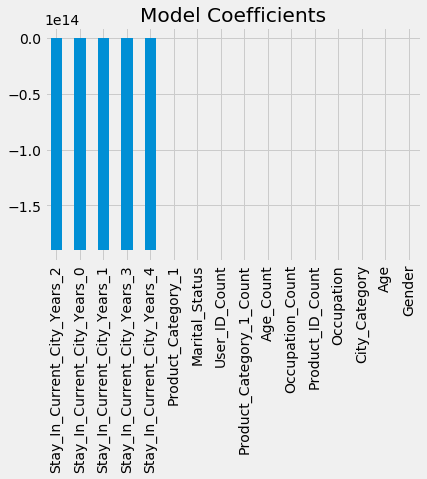

In [51]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 2694
CV Score : Mean - 2944 | Std - 808.7 | Min - 2724 | Max - 6468


## Random Forest

In [58]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')


Model Report
RMSE : 2815
CV Score : Mean - 3014 | Std - 798.6 | Min - 2800 | Max - 6494


## XGBoost

In [55]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [60]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])
# make predictions
predictions = my_model.predict(test_df[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGBoost.csv", index=False)

Mean Absolute Error : 877.3274052798961
RMSE : 2972


##### Conclusion:
The model works best on Decision Tree Algo with RMSE : 2698